#### SATYAM SINGH

In [6]:
## Data Analysis Phase
## Main aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(Profit)


In [7]:
data = pd.read_csv('SampleSuperstore.csv')

In [8]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
data.shape

(9994, 13)

In [53]:
## Here we will check the percentage of nan values present in each feature
print("total number of null values = ",data.isnull().sum().sum())



total number of null values =  0


In [51]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [55]:
print(data.info())     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


In [116]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [117]:
print("Duplicate data in the dataset: ",data.duplicated().sum())

Duplicate data in the dataset:  17


In [118]:
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [119]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


### Numerical Variables

In [120]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  5


,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


C:\Users\Legion\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


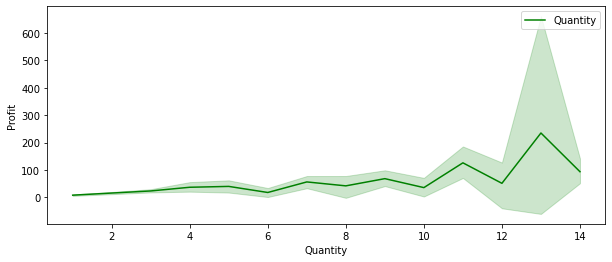

In [121]:
## We will check whether there is a relation between Quantity of items  and the Profit
plt.figure(figsize = (10,4))
sns.lineplot('Quantity', 'Profit', data = data, color = 'g', label= 'Quantity')
plt.legend()



C:\Users\Legion\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


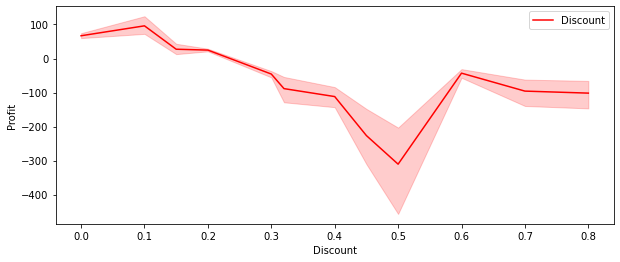

In [122]:
## We will check whether there is a relation between Discount on items and the Profit
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = data, color = 'r', label= 'Discount')
plt.legend()



### Numerical variables are usually of 2 type
### 1. Continous variable 
### 2.Discrete Variables

In [123]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [124]:
data[discrete_feature].head()

,Quantity,Discount
0,2,0.00
1,3,0.00
2,2,0.00
3,5,0.45
4,2,0.20


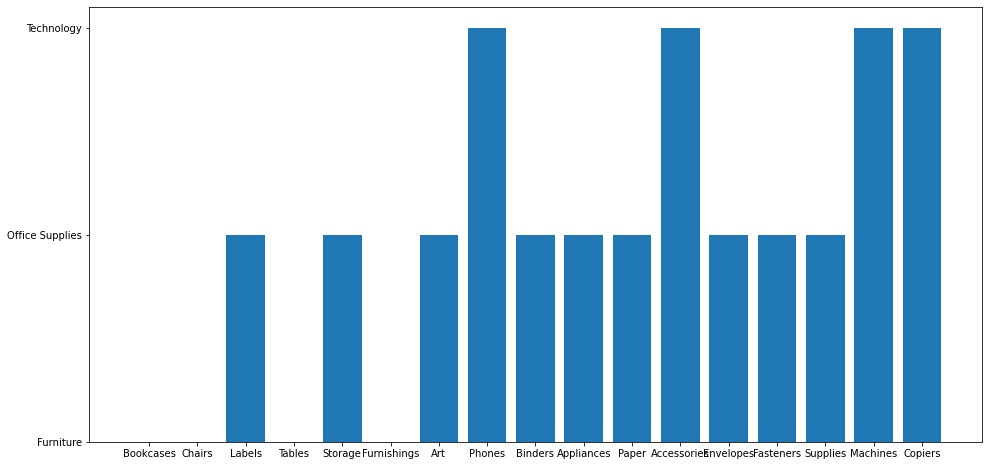

In [125]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=data)
plt.show()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

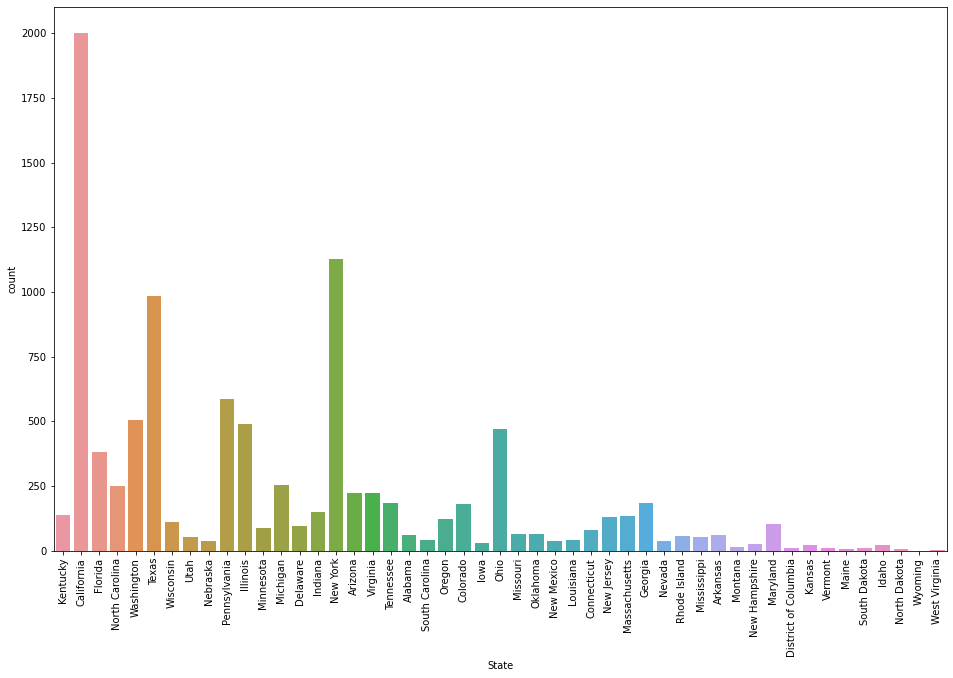

In [126]:
col=['Postal Code']
df1=data.drop(columns=col,axis=1)
print(df1['State'].value_counts())
plt.figure(figsize=(16,10))
sns.countplot(x=df1['State'])
plt.xticks(rotation=90)
plt.show()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


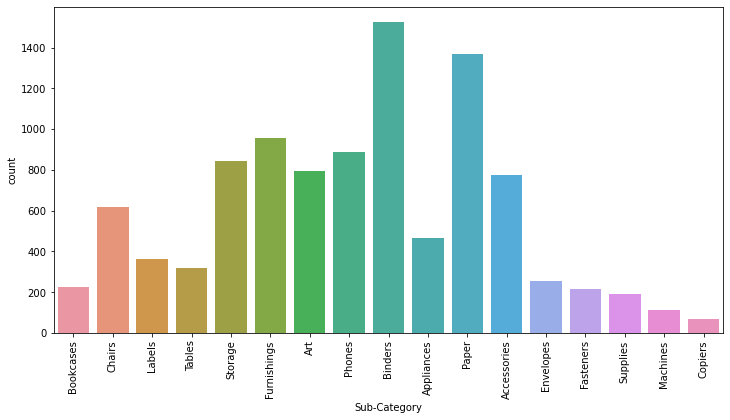

In [127]:
print(data['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

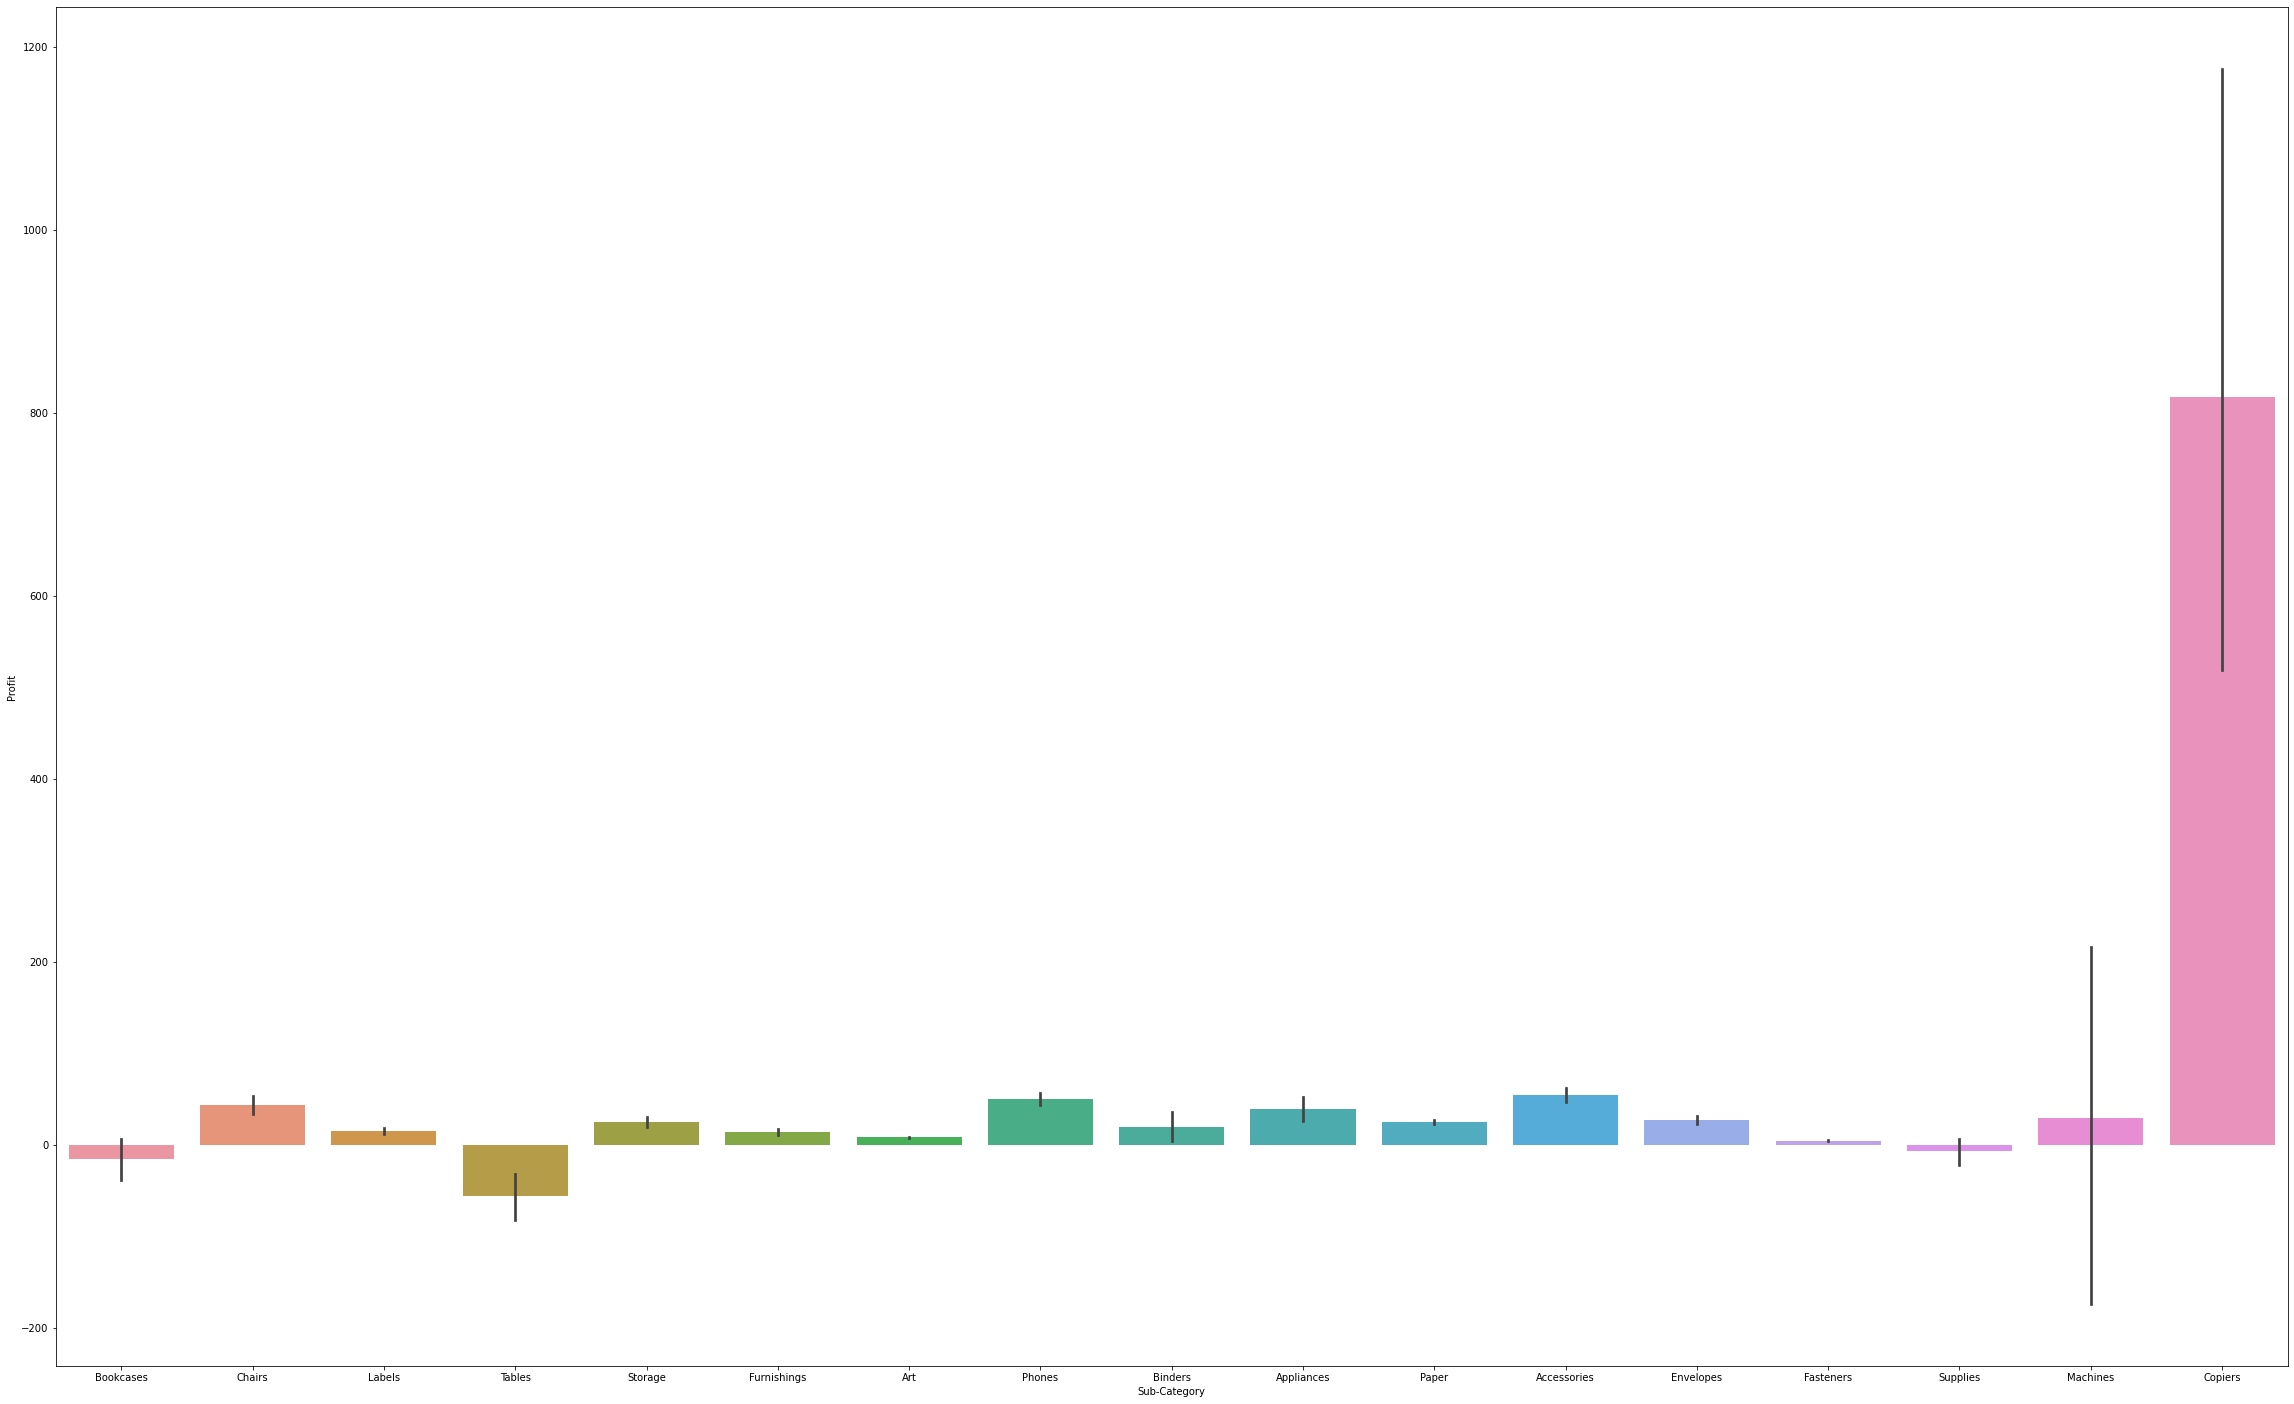

In [128]:
plt.figure(figsize=(40,25))
sns.barplot(x=data['Sub-Category'], y=data['Profit'])

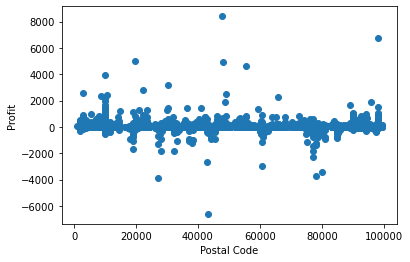

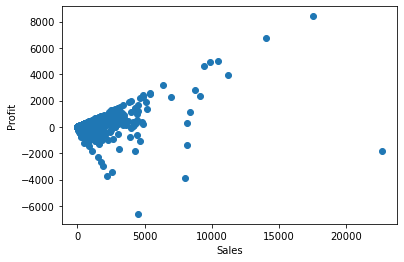

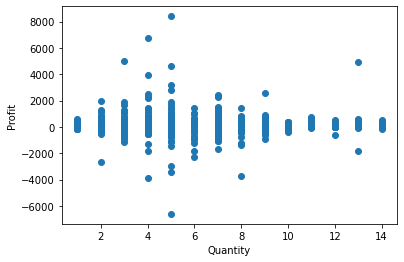

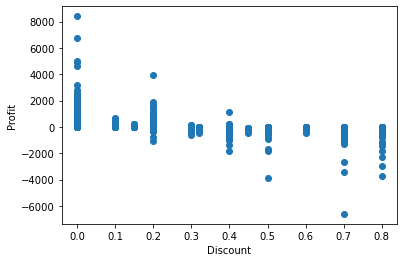

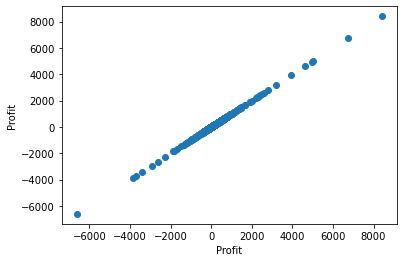

In [129]:
## Here we will compare the difference between All numerical feature with Profit

for feature in numerical_features:

        dataset=data.copy()
        plt.scatter(dataset[feature],dataset['Profit'])
        plt.xlabel(feature)
        plt.ylabel('Profit')
        plt.show()

    

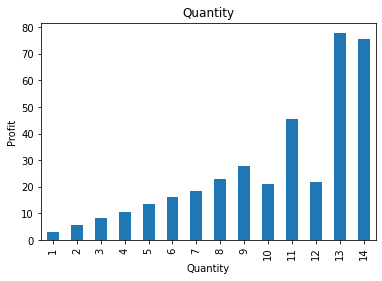

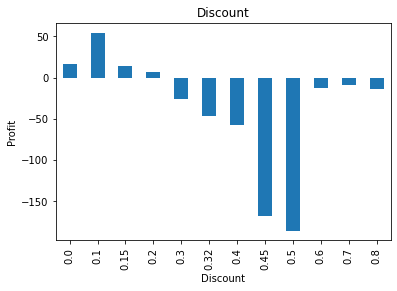

In [39]:
## Lets Find the realtionship between them and Profit

for feature in discrete_feature:
    dataset=data.copy()
    dataset.groupby(feature)['Profit'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.title(feature)
    plt.show()

In [43]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


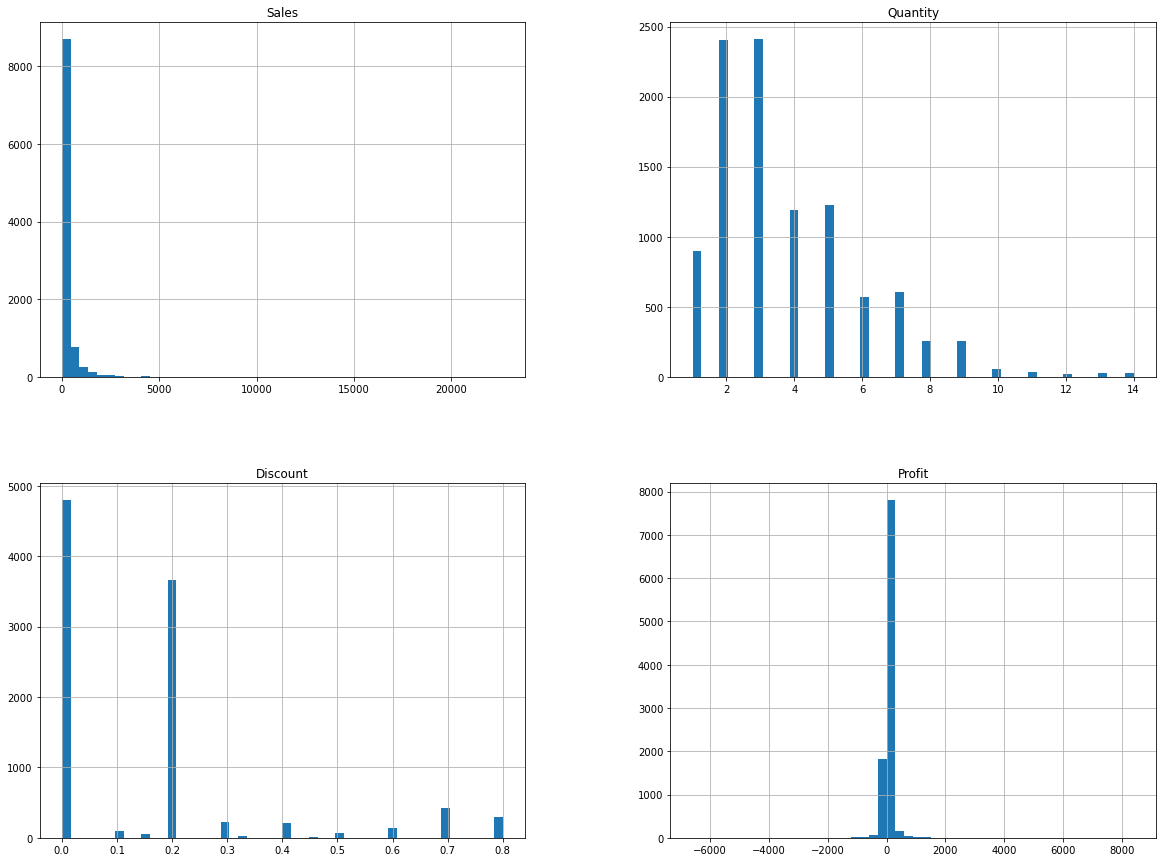

In [93]:
## Lets analyse the continuous values by creating histograms to understand the distribution

df1.hist(bins=50 ,figsize=(20,15))
plt.show()


C:\Users\Legion\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


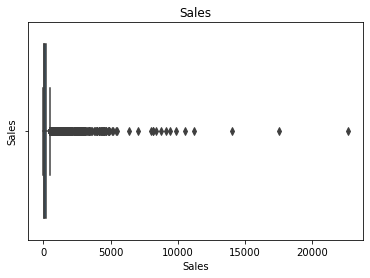

C:\Users\Legion\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


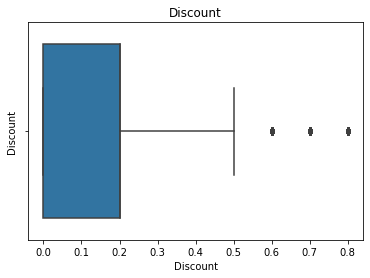

C:\Users\Legion\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


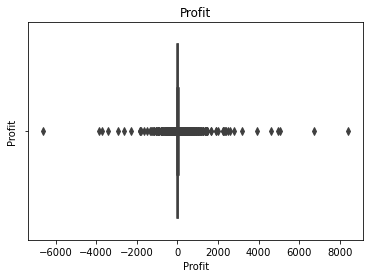

In [106]:

for feature in ['Sales','Discount','Profit']:
    sns.boxplot(data[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
        

### Categorical Variables

In [47]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

In [48]:
data[categorical_features].head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [49]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Ship Mode and number of categories are 4
The feature is Segment and number of categories are 3
The feature is Country and number of categories are 1
The feature is City and number of categories are 531
The feature is State and number of categories are 49
The feature is Region and number of categories are 4
The feature is Category and number of categories are 3
The feature is Sub-Category and number of categories are 17


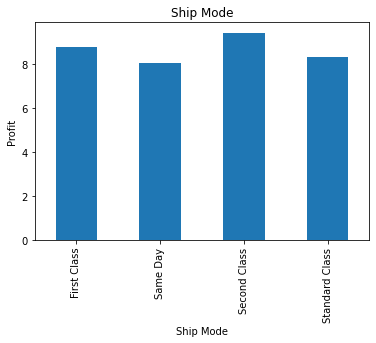

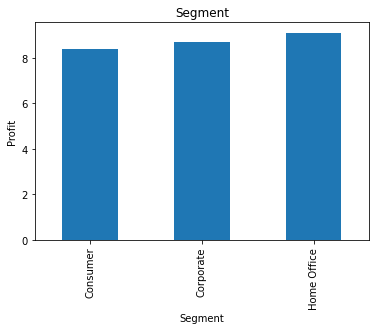

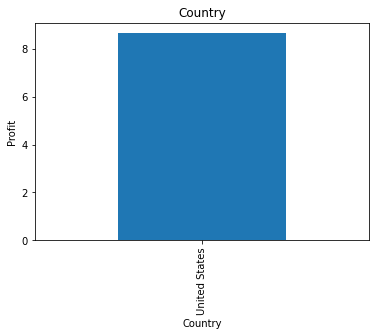

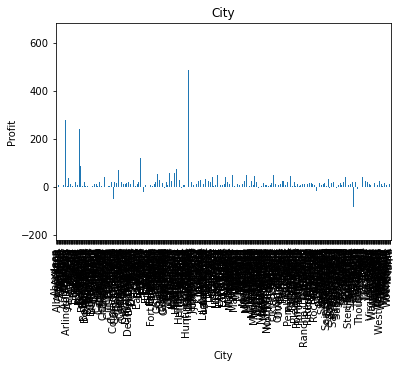

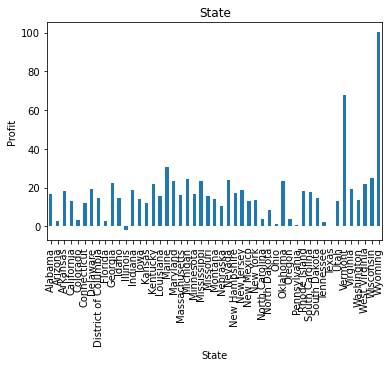

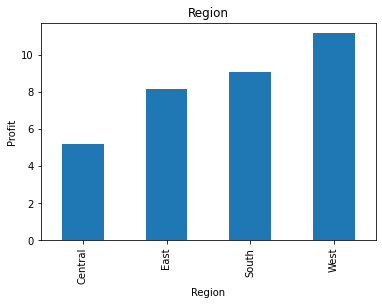

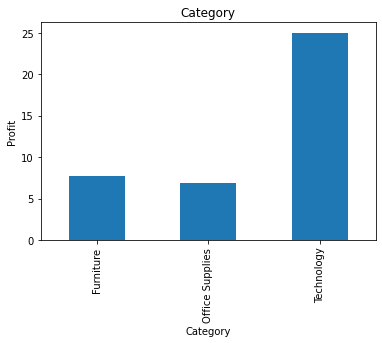

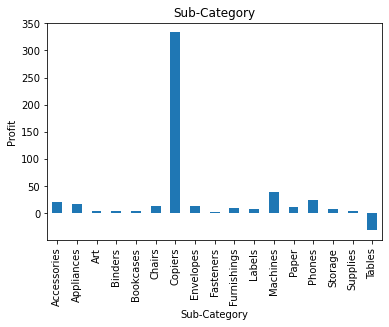

In [112]:
## Find out the relationship between categorical variable and dependent feature Profit
for feature in categorical_features:
    dataset=data.copy()
    dataset.groupby(feature)['Profit'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.title(feature)
    plt.show()

In [114]:
## Here I have sorted the data based on median values so that I can get the info. about the states that yield overall more profit
df = data.groupby("State").Profit.agg(["sum","mean","min","max","count","median"])
df.sort_values(['median'],ascending=False)

,sum,mean,min,max,count,median
State,,,,,,
Wyoming,100.1960,100.196000,100.1960,100.1960,1,100.19600
Vermont,2244.9783,204.088936,0.9588,1013.1270,11,67.65990
Maine,454.4862,56.810775,3.8822,131.3550,8,30.73400
Wisconsin,8401.8004,76.380004,0.2598,673.8816,110,25.10085
Michigan,24463.1876,95.934069,0.0000,4946.3700,255,24.22560
Nevada,3316.7659,85.045279,-109.5822,1644.2913,39,23.80800
Maryland,7031.1788,66.963608,-47.1798,1270.9900,105,23.68080
Oklahoma,4853.9560,73.544788,0.5520,523.7052,66,23.53605
Mississippi,3172.9762,59.867475,0.0000,388.8128,53,23.40000


## TASK 3 COMPLETED